In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [4]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[1 1 0 1]
 [0 1 1 1]
 [1 0 0 0]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 0 0]
 [1 1 1 0]
 [1 1 1 1]]


In [5]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [6]:
onemax(pop[5,:])

1

In [7]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [8]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [9]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [10]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = crossover(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


In [11]:
np.random.seed(42)
num_parameters = 100
num_individuals = 128
max_evaluations = 2**15
pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

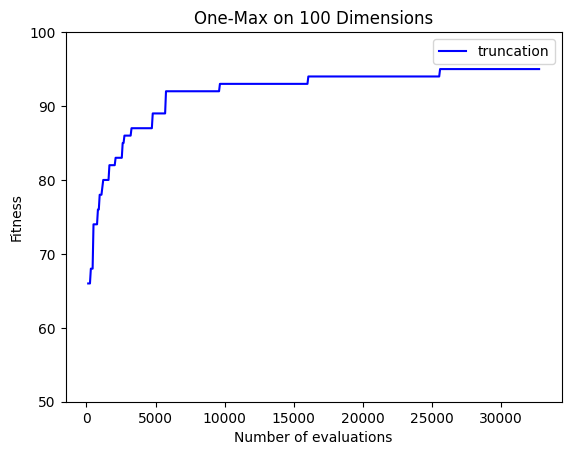

In [12]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

In [27]:
n_trials = 10
num_parameters = 50
max_evaluations = 10000
num_individuals = 24 # population size

fits_truncation = []
evals = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals = best_fitness[:,0]
    fits_truncation.append(best_fitness[:,1])

In [28]:
fits_truncation = np.array(fits_truncation)

In [29]:
fits_truncation

array([[31, 32, 35, ..., 50, 50, 50],
       [34, 34, 38, ..., 50, 50, 50],
       [32, 32, 35, ..., 50, 50, 50],
       ...,
       [31, 31, 32, ..., 50, 50, 50],
       [31, 34, 34, ..., 50, 50, 50],
       [32, 32, 35, ..., 50, 50, 50]])

In [30]:
avg = np.mean(fits_truncation, axis=0)
err = np.std(fits_truncation, axis=0)
avg

array([31.8, 33.1, 34.9, 35.5, 36.3, 36.8, 37.6, 37.7, 38.9, 39.2, 40.6,
       40.7, 40.7, 41.2, 41.4, 41.5, 41.8, 42.1, 42.5, 42.5, 42.6, 42.8,
       43. , 43.6, 43.6, 43.7, 43.8, 44.3, 44.3, 44.4, 44.6, 45. , 45.3,
       45.4, 45.4, 45.4, 45.5, 45.7, 45.8, 45.8, 45.8, 45.9, 46.2, 46.3,
       46.3, 46.3, 46.4, 46.5, 46.6, 46.6, 46.7, 46.8, 46.8, 46.8, 47. ,
       47. , 47. , 47. , 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.6,
       47.7, 47.8, 47.8, 47.8, 47.8, 47.8, 47.8, 47.9, 47.9, 47.9, 48. ,
       48. , 48. , 48. , 48. , 48. , 48. , 48. , 48. , 48.3, 48.4, 48.4,
       48.4, 48.4, 48.4, 48.4, 48.4, 48.4, 48.4, 48.5, 48.9, 48.9, 48.9,
       48.9, 48.9, 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. ,
       49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. ,
       49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. , 49. ,
       49. , 49. , 49. , 49. , 49.1, 49.1, 49.1, 49.1, 49.1, 49.1, 49.1,
       49.1, 49.1, 49.1, 49.1, 49.1, 49.1, 49.1, 49

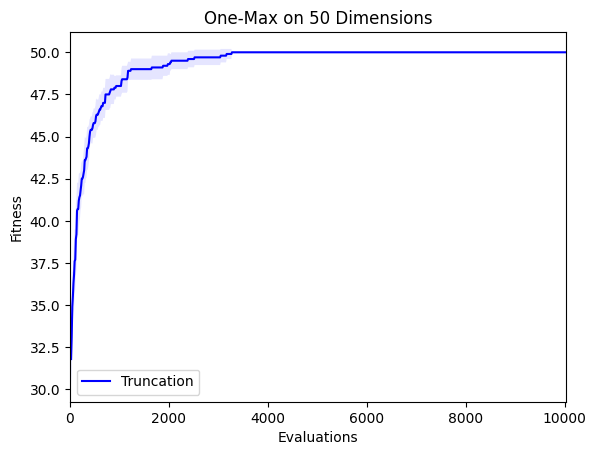

In [32]:
plt.plot(evals, avg, label="Truncation", color='b')
plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();